In [1]:
from peak_warming_calculator import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
plt.rc('font', family='serif')

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt

In [3]:
import time

In [4]:
from varying_g_test import *

## Not Sampling s

In [5]:
consumption_growth_array = np.linspace(0.01, 0.035, 6)

In [6]:
consumption_growth_array

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035])

In [7]:
# Define the model inputs
problem_2 = {
'num_vars': 2,
'names': ['P_50/P_100', 'P_100'],
'bounds': [[0.5, 0.8],
[100, 500]]
}
# Generate samples
param_values_2 = saltelli.sample(problem_2, 16)

In [8]:
param_values_2

array([[  0.528125, 287.5     ],
       [  0.640625, 287.5     ],
       [  0.528125, 362.5     ],
       [  0.528125, 362.5     ],
       [  0.640625, 287.5     ],
       [  0.640625, 362.5     ],
       [  0.678125, 487.5     ],
       [  0.790625, 487.5     ],
       [  0.678125, 162.5     ],
       [  0.678125, 162.5     ],
       [  0.790625, 487.5     ],
       [  0.790625, 162.5     ],
       [  0.753125, 187.5     ],
       [  0.565625, 187.5     ],
       [  0.753125, 462.5     ],
       [  0.753125, 462.5     ],
       [  0.565625, 187.5     ],
       [  0.565625, 462.5     ],
       [  0.603125, 387.5     ],
       [  0.715625, 387.5     ],
       [  0.603125, 262.5     ],
       [  0.603125, 262.5     ],
       [  0.715625, 387.5     ],
       [  0.715625, 262.5     ],
       [  0.640625, 137.5     ],
       [  0.753125, 137.5     ],
       [  0.640625, 212.5     ],
       [  0.640625, 212.5     ],
       [  0.753125, 137.5     ],
       [  0.753125, 212.5     ],
       [  

In [9]:
P_100_list = []

for i in range(len(param_values_2)):
    P_100_list.append(param_values_2[i][1])

In [10]:
def vary_consumption_growth2(consumption_growth):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
        s = r * np.log(5)/np.log((P_100)/(P_50))
#         constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
#         s = r * np.log(constraint)/np.log((P_100)/(P_50))
        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(P_50=P_50, P_100=P_100, consumption_growth=consumption_growth, consumption_discount=consumption_discount, return_all_output=True, s=s, r=r)
        SCC_forecasted_0[i] = SCC_forecasted[0]
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
    return Y, SCC_forecasted_0, T_year_list

In [11]:
Y_array = []
SCC_0_array = []
T_year_array = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth2(consumption_growth_array[i])
    Y_array.append(Y)
    SCC_0_array.append(SCC_0)
    T_year_array.append(T_year)

0
07:09:58


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:233: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


8
07:11:17
16
07:12:34
24
07:13:50
32
07:14:58
40
07:16:11
48
07:17:25
56
07:18:34
64
07:19:43
72
07:20:53
80
07:21:54
88
07:23:09
0
07:24:23
8
07:25:03
16
07:25:42
24
07:26:21
32
07:26:58
40
07:27:38
48
07:28:18
56
07:29:00
64
07:29:39
72
07:30:22
80
07:31:03
88
07:31:48
0
07:32:30
8
07:32:58
16
07:33:28
24
07:33:55
32
07:34:22
40
07:34:49
48
07:35:14
56
07:35:39
64
07:36:06
72
07:36:35
80
07:37:06
88
07:37:35
0
07:38:02
8
07:38:24
16
07:38:46
24
07:39:09
32
07:39:32
40
07:39:54
48
07:40:20
56
07:40:44
64
07:41:07
72
07:41:29
80
07:41:52
88
07:42:14
0
07:42:39
8
07:43:00
16
07:43:19
24
07:43:40
32
07:44:01
40
07:44:22
48
07:44:44
56
07:45:05
64
07:45:26
72
07:45:47
80
07:46:09
88
07:46:29
0
07:46:50
8
07:47:09
16
07:47:28
24
07:47:46
32
07:48:04
40
07:48:21
48
07:48:40
56
07:48:58
64
07:49:16
72
07:49:35
80
07:49:54
88
07:50:12


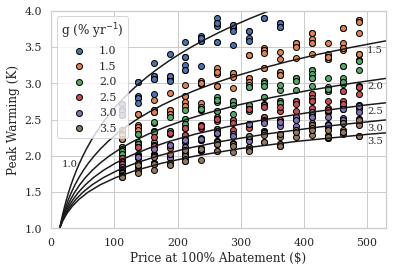

In [134]:
fig = plt.figure()

## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array[i], label=np.round(consumption_growth_array[i]*100, 3), edgecolors= "black")

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g (% yr$^{-1}$)")
plt.xlim(0, 530)
plt.ylim(1, 4)
plt.xlabel("Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")

plt.text(500, 2.17, '3.5', size="small")
plt.text(500, 2.35, '3.0', size="small")
plt.text(500, 2.58, '2.5', size="small")
plt.text(500, 2.92, '2.0', size="small")
plt.text(500, 3.42, '1.5', size="small")
plt.text(17, 1.85, '1.0', size="small")


# fig.savefig('figures/standard_runs.png', bbox_inches='tight', dpi = 300)

In [13]:
# np.savetxt("parameter_sensitivity_runs/Y_array_condition", Y_array, delimiter=",")

In [14]:
# np.savetxt("parameter_sensitivity_runs/SCC_0_array_condition", SCC_0_array, delimiter=",")

### Plotting MAC curves for above

In [15]:
def abatement(P, P0, P_50, P_100, r=0.04, s=0.05):  # 0.05
    if P0 >= P_50:
        print("P0 is greater than P_50")
    elif ((P_100-P0)/(P_50-P0))**(s/r) <= 2:
        print("MAC curve condition not satisfied")
    
    P_h = P0 + ((P_50 - P0) ** (-s / r) - 2 * (P_100 - P0) ** (-s / r)) ** (-r / s)
    Am = 1 + ((P_100 - P0) / (P_h - P0)) ** (-s / r)
    
    A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
    
    return A

In [16]:
consumption_growth_array[2]

0.02

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_79442/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_79442/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_79442/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_79442/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_79442/2643110261.py:10: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))
/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_7

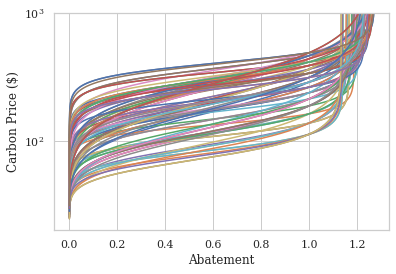

In [17]:
fig = plt.figure()

# SCC_25 = np.arange(25, 1000)
consumption_growth = consumption_growth_array[2]

for i in range(len(param_values_2)):  # 20
    SCC = np.arange(SCC_0_array[2][i], 1000)
    P0 = SCC[0]
    P_50 = param_values_2[i][0]*param_values_2[i][1]
    P_100 = param_values_2[i][1]
    consumption_discount = consumption_growth + 0.015
    r = consumption_discount
#     constraint = param_values_2[i][1]
    s = r * np.log(5)/np.log((P_100)/(P_50))
#     if constraint >2.5:
#     print(constraint)
    plt.plot(abatement(SCC, P0=P0, P_100=P_100, P_50=P_50, r=r, s=s), SCC)

plt.xlabel("Abatement")
plt.ylabel("Carbon Price ($)")
plt.yscale("log")
# plt.legend(title="P0 ($)")
plt.ylim(20, 1000)

# fig.savefig('figures/associated_MACC.png', bbox_inches='tight', dpi = 300)

### Looking at SCC_0

In [18]:
SCC_0_array[0]

array([31.3358636 , 32.24459261, 32.13724786, 32.13724786, 32.24459261,
       32.94887847, 33.84111185, 34.23959973, 30.28890615, 30.28890615,
       34.23959973, 31.14510307, 31.4791045 , 29.91459193, 34.02661501,
       34.02661501, 29.91459193, 33.11740495, 32.89707764, 33.50747329,
       31.6494818 , 31.6494818 , 33.50747329, 32.42737125, 29.10945093,
       30.10177774, 31.14125257, 31.14125257, 30.10177774, 31.94746398,
       33.48809224, 32.49888347, 33.92579318, 33.92579318, 32.49888347,
       33.06410542, 32.09448423, 31.84790408, 28.72792806, 28.72792806,
       31.84790408, 28.38969327, 32.9736042 , 32.70022451, 31.96602259,
       31.96602259, 32.70022451, 31.63848886, 29.00840654, 30.12785045,
       32.84127211, 32.84127211, 30.12785045, 33.52165711, 33.24864222,
       31.97155761, 31.97440101, 31.97440101, 31.97155761, 30.3766951 ,
       32.73170909, 32.53435225, 33.41258133, 33.41258133, 32.53435225,
       33.24759167, 33.45489176, 33.23734452, 28.94151351, 28.94

In [129]:
df = pd.DataFrame(SCC_0_array, index=np.round(consumption_growth_array*100,3)).transpose()

In [130]:
df

,1.0,1.5,2.0,2.5,3.0,3.5
0,31.335864,29.491376,27.984441,26.732232,25.684463,24.829151
1,32.244593,30.432274,28.895395,27.613742,26.524098,25.591412
2,32.137248,30.365767,28.861165,27.599756,26.524686,25.601909
3,32.137248,30.365767,28.861165,27.599756,26.524686,25.601909
4,32.244593,30.432274,28.895395,27.613742,26.524098,25.591412
...,...,...,...,...,...,...
91,33.218966,31.477010,29.963770,28.651148,27.531194,26.561834
92,32.849978,31.177469,29.700566,28.431120,27.341769,26.397450
93,32.849978,31.177469,29.700566,28.431120,27.341769,26.397450
94,33.218966,31.477010,29.963770,28.651148,27.531194,26.561834


In [131]:
# df.boxplot(whis=100)

In [132]:
colour_scheme = ["orange","blue","yellow","green","purple","red"]

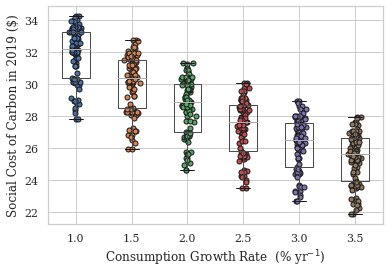

In [133]:
fig = plt.figure()

for i,d in enumerate(df):
    y = df[df.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, mec='k', ms=5, marker="o", linestyle="None")  #  mfc = colour_scheme[i],
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)  # whiskerprops = dict(linewidth=1.5), boxprops = dict(linewidth=1.5), medianprops=dict(linewidth=2, color="gray"), flierprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5)
plt.xlabel("Consumption Growth Rate  (% yr$^{-1}$)")
plt.ylabel("Social Cost of Carbon in 2019 ($)")

# fig.savefig('figures/SCC.png', bbox_inches='tight', dpi = 300)

In [24]:
df_T = pd.DataFrame(T_year_array, index=np.round(consumption_growth_array,3)).transpose()

In [25]:
df_T

,0.010,0.015,0.020,0.025,0.030,0.035
0,2198.0,2151.0,2124.0,2107.0,2095.0,2086.0
1,2192.0,2147.0,2122.0,2105.0,2093.0,2085.0
2,2213.0,2161.0,2133.0,2114.0,2101.0,2091.0
3,2213.0,2161.0,2133.0,2114.0,2101.0,2091.0
4,2192.0,2147.0,2122.0,2105.0,2093.0,2085.0
...,...,...,...,...,...,...
91,2190.0,2147.0,2122.0,2106.0,2094.0,2085.0
92,2234.0,2176.0,2144.0,2123.0,2109.0,2098.0
93,2234.0,2176.0,2144.0,2123.0,2109.0,2098.0
94,2190.0,2147.0,2122.0,2106.0,2094.0,2085.0


In [26]:
# for i,d in enumerate(df_T):
#     y = df_T[df_T.columns[i]]
#     x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
#     plt.plot(x, y, mec='k', ms=4, marker="o", linestyle="None") # # mfc = ["orange","blue","yellow","green","purple","red"][i]
    
# # plt.boxplot(df, whis=100)
# df_T.boxplot(whis=1000, whiskerprops = dict(linewidth=2), boxprops = dict(linewidth=2), medianprops=dict(linewidth=2, color="gray"), flierprops=dict(linewidth=2), capprops=dict(linewidth=2))
# plt.xlabel("Consumption Growth Rate")
# plt.ylabel("Year of Peak Warming")

In [27]:
# plt.scatter(df_T[df_T.columns[0]], Y_array[0], color=colour_scheme[0])

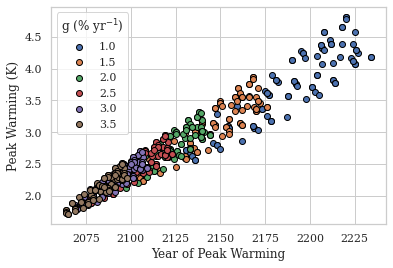

In [143]:
fig = plt.figure()

for i in range(df_T.shape[1]):
    plt.scatter(df_T[df_T.columns[i]], Y_array[i], edgecolors= "black", label=np.round(consumption_growth_array[i]*100, 3))

plt.legend(title="g (% yr$^{-1}$)")
plt.xlabel("Year of Peak Warming")
plt.ylabel("Peak Warming (K)")

# fig.savefig('figures/Year_of_Peak.png', bbox_inches='tight', dpi = 300)

In [29]:
df_T.shape[1]

6

# Varying g

In [30]:
def vary_consumption_growth2_g(consumption_growth, P0_prime):
    Y = np.zeros([param_values_2.shape[0]])
    SCC_forecasted_0 = np.zeros([param_values_2.shape[0]])
    T_year_list = np.zeros([param_values_2.shape[0]])

#     consumption_growth = 0.020
    consumption_discount = consumption_growth + 0.015

    for i in range(len(param_values_2)):
        if i%8 == 0:
            print(i)
            t = time.localtime()
            current_time = time.strftime("%H:%M:%S", t)
            print(current_time)
        
        P_50 = param_values_2[i][0]*param_values_2[i][1]
        P_100 = param_values_2[i][1]
        r = consumption_discount
        s = r * np.log(5)/np.log((P_100)/(P_50))
#         constraint = param_values_2[i][1]
#         s = r * np.log(constraint)/np.log((P_100 - P0)/(P_50 - P0))
#         s = r * np.log(constraint)/np.log((P_100)/(P_50))

        Y[i], SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete, SCC_0 = varying_g_peak_warming_calculator(P_50=P_50, P_100=P_100, g_2019=consumption_growth, consumption_discount=consumption_discount, return_all_output=True, s=s, r=r, P0_prime=P0_prime[i])
        SCC_forecasted_0[i] = SCC_0
        start_year = 1750
        peak_T = Y[i]
        T_year_list[i] = next(x[0] for x in enumerate(T_complete) if x[1] == peak_T) + start_year
        if Y[i] < 1.4:
            print(param_values_2[i][0])
            print(param_values_2[i][1])
            print(consumption_discount)
    return Y, SCC_forecasted_0, T_year_list

In [31]:
# Y, SCC_forecasted_0, T_year_list

In [32]:
SCC_0_array

[array([31.3358636 , 32.24459261, 32.13724786, 32.13724786, 32.24459261,
        32.94887847, 33.84111185, 34.23959973, 30.28890615, 30.28890615,
        34.23959973, 31.14510307, 31.4791045 , 29.91459193, 34.02661501,
        34.02661501, 29.91459193, 33.11740495, 32.89707764, 33.50747329,
        31.6494818 , 31.6494818 , 33.50747329, 32.42737125, 29.10945093,
        30.10177774, 31.14125257, 31.14125257, 30.10177774, 31.94746398,
        33.48809224, 32.49888347, 33.92579318, 33.92579318, 32.49888347,
        33.06410542, 32.09448423, 31.84790408, 28.72792806, 28.72792806,
        31.84790408, 28.38969327, 32.9736042 , 32.70022451, 31.96602259,
        31.96602259, 32.70022451, 31.63848886, 29.00840654, 30.12785045,
        32.84127211, 32.84127211, 30.12785045, 33.52165711, 33.24864222,
        31.97155761, 31.97440101, 31.97440101, 31.97155761, 30.3766951 ,
        32.73170909, 32.53435225, 33.41258133, 33.41258133, 32.53435225,
        33.24759167, 33.45489176, 33.23734452, 28.9

In [33]:
P0_prime_array = SCC_0_array

In [34]:
Y_array_2 = []
SCC_0_array_2 = []
T_year_array_2 = []

for i in range(len(consumption_growth_array)):  # len(consumption_growth_array)
    Y, SCC_0, T_year = vary_consumption_growth2_g(consumption_growth_array[i], P0_prime_array[i])
    Y_array_2.append(Y)
    SCC_0_array_2.append(SCC_0)
    T_year_array_2.append(T_year)

0
07:50:34


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/varying_g_peak_warming_calculator.py:286: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
8
07:52:35
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
P_100 not achieved by achieved by final perturbed year
16
07:54:49
24
07:55:44
32
07:56:18
40
07:57:20
48
07:58:06
56
07:58:56
64
07:59:39
72
08:00:29
80
08:01:19
8

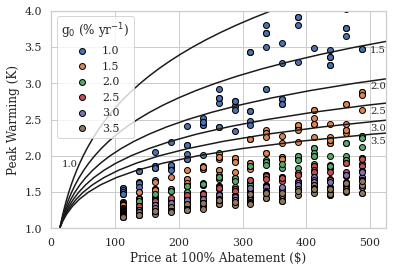

In [136]:
fig = plt.figure()

## plot output

for i in range(len(Y_array)):
    plt.scatter(P_100_list, Y_array_2[i], label=np.round(consumption_growth_array[i]*100, 3), edgecolors= "black")

# plt.legend()
plt.rc('font', family='serif')

## plot curves from Myles' paper

# W0 = 75*10**12  
W0 = 80*10**12  
D0 = 0.00267
T_TCRE = 0.00054  # degrees Celsius per GtCO2
# note: this corresponds to 0.002 degrees Celsius per GtC
r_minus_g = 0.015  # 1.5%
ks = 0.12  # per year

G = W0*D0*T_TCRE*(1/(r_minus_g)-1/(ks+r_minus_g))

gamma = 2
# E_0 = 39  # 2014 level of emissions
# percentage_of_emissions = 0.75  # set here the percentage of emisison
# E_bar = percentage_of_emissions*E_0
E_bar = 0.75*40.040508
# T_0 = 0.9  # 1.0136929156818866  # degrees Celsius
T_0 = 1.0136929156818866

T_m = np.arange(1, 5,0.1)
g_bar = np.arange(0.01, 0.04, 0.005)

for i in range(len(g_bar)):
    A_B = gamma*G*(T_m**(gamma-1))*np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE)
#     print(gamma, G, T_m)
#     print(np.exp((g_bar[i]/E_bar) * (T_m-T_0)/T_TCRE))
    plt.plot(A_B*10**(-9), T_m, color="k")  # convert cost into trillions of dollars # , label=g_bar[i]

plt.legend(title="g$_{0}$ (% yr$^{-1}$)")
plt.xlim(0, 525)
plt.ylim(1, 4)
plt.xlabel("Price at 100% Abatement ($)")
plt.ylabel("Peak Warming (K)")

plt.text(500, 2.17, '3.5', size="small")
plt.text(500, 2.35, '3.0', size="small")
plt.text(500, 2.58, '2.5', size="small")
plt.text(500, 2.92, '2.0', size="small")
plt.text(500, 3.42, '1.5', size="small")
plt.text(17, 1.85, '1.0', size="small")

# fig.savefig('figures/standard_runs_varying_g.png', bbox_inches='tight', dpi = 300)

In [140]:
df_T_2 = pd.DataFrame(T_year_array_2, index=np.round(consumption_growth_array*100,3)).transpose()

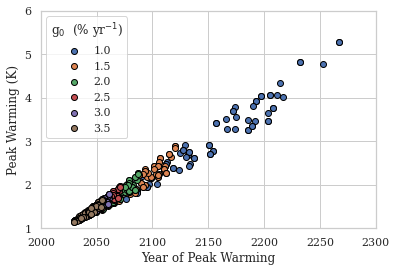

In [142]:
fig = plt.figure()

for i in range(df_T_2.shape[1]):
    plt.scatter(df_T_2[df_T_2.columns[i]], Y_array_2[i], edgecolors= "black", label=np.round(consumption_growth_array[i]*100, 3))

plt.legend(title="g$_{0}$  (% yr$^{-1}$)")
plt.xlabel("Year of Peak Warming")
plt.ylabel("Peak Warming (K)")
plt.xlim(2000, 2300)
plt.ylim(1, 6)

# fig.savefig('figures/Year_of_Peak_varying_g.png', bbox_inches='tight', dpi = 300)

In [39]:
T_year_array_2[0]

array([2124., 2132., 2154., 2154., 2132., 2167., 2253., 3000., 2078.,
       2078., 3000., 2080., 2091., 2086., 2267., 2267., 2086., 2204.,
       2174., 2193., 2118., 2118., 2193., 2125., 2067., 2068., 2099.,
       2099., 2068., 2103., 2174., 2151., 2232., 2232., 2151., 2186.,
       2113., 2111., 2057., 2057., 2111., 2057., 2192., 2186., 2137.,
       2137., 2186., 2134., 2076., 2078., 2189., 2189., 2078., 2212.,
       2175., 2152., 2112., 2112., 2152., 2104., 2129., 2127., 2172.,
       2172., 2127., 2166., 2217., 2208., 2067., 2067., 2208., 2066.,
       2097., 2095., 2086., 2086., 2095., 2086., 2214., 2205., 2197.,
       2197., 2205., 2190., 2057., 2056., 2133., 2133., 2056., 2130.,
       2133., 2157., 2204., 2204., 2157., 2337.])

In [52]:
param_values_2[0]

array([  0.528125, 287.5     ])

In [51]:
SCC_0_array[0][0]

31.33586359531034

In [54]:
Y_array_2[0][0]

2.3403155722457916

In [58]:
df_2 = pd.DataFrame(SCC_0_array_2, index=np.round(consumption_growth_array,3)).transpose()

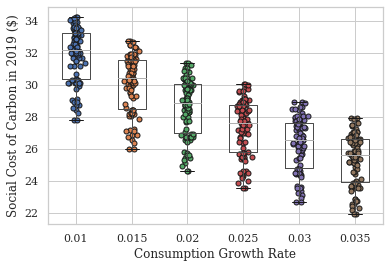

In [59]:
fig = plt.figure()

for i,d in enumerate(df_2):
    y = df_2[df_2.columns[i]]
    x = np.random.normal(i+1, 0.05, len(y))  # consumption_growth_array[i]
    plt.plot(x, y, mec='k', ms=5, marker="o", linestyle="None")  #  mfc = colour_scheme[i],
    
# plt.boxplot(df, whis=100)
df.boxplot(whis=100)  # whiskerprops = dict(linewidth=1.5), boxprops = dict(linewidth=1.5), medianprops=dict(linewidth=2, color="gray"), flierprops=dict(linewidth=1.5), capprops=dict(linewidth=1.5)
plt.xlabel("Consumption Growth Rate")
plt.ylabel("Social Cost of Carbon in 2019 ($)")

# fig.savefig('figures/SCC_varying_g.png', bbox_inches='tight', dpi = 300)

In [60]:
SCC_0_array

[array([31.3358636 , 32.24459261, 32.13724786, 32.13724786, 32.24459261,
        32.94887847, 33.84111185, 34.23959973, 30.28890615, 30.28890615,
        34.23959973, 31.14510307, 31.4791045 , 29.91459193, 34.02661501,
        34.02661501, 29.91459193, 33.11740495, 32.89707764, 33.50747329,
        31.6494818 , 31.6494818 , 33.50747329, 32.42737125, 29.10945093,
        30.10177774, 31.14125257, 31.14125257, 30.10177774, 31.94746398,
        33.48809224, 32.49888347, 33.92579318, 33.92579318, 32.49888347,
        33.06410542, 32.09448423, 31.84790408, 28.72792806, 28.72792806,
        31.84790408, 28.38969327, 32.9736042 , 32.70022451, 31.96602259,
        31.96602259, 32.70022451, 31.63848886, 29.00840654, 30.12785045,
        32.84127211, 32.84127211, 30.12785045, 33.52165711, 33.24864222,
        31.97155761, 31.97440101, 31.97440101, 31.97155761, 30.3766951 ,
        32.73170909, 32.53435225, 33.41258133, 33.41258133, 32.53435225,
        33.24759167, 33.45489176, 33.23734452, 28.9